# HW2 - Regression - Combined Cycle Power Plant Data Set
## Abhishek Ajmera
## USC id: 8586888981
## Github ID: abhishekajmera

### The Dataset
The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant

In [621]:
# importing packages
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# For alll intents and purposes, considering alpha as 0.05

#### (a) Download the Combined Cycle Power Plant data1 from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [622]:
# Loading data into a dataframe
data = pd.read_excel('../Data/Folds5x2_pp.xlsx',sheet_name='Sheet1')
df=pd.DataFrame(data)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?


In [623]:
# number of columns
len(df.columns)

5

In [624]:
# number of rows
len(df)

9568

In [625]:
# The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the 
# power plant was set to work with full load. 

# Features consist of hourly average ambient variables Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH)
# and Exhaust Vacuum (V) to predict the net hourly electrical energy  output (PE)  of the plant.

# Coulumns represent the aforementioned parameters
# Rows represent an instance of data collection - 1 record

#The base load operation of a power plant is influenced by four main parameters, which are used as input variables
# in the dataset, such as ambient temperature, atmospheric pressure, relative humidity, and exhaust steam pressure.
# These parameters affect electrical power output, which is considered as the target variable.
# The dataset, which consists of these input and target variables, was collected over a six-year period. 
# First, based on these variables the best subset of the dataset is explored among all feature subsets in the experiments.

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

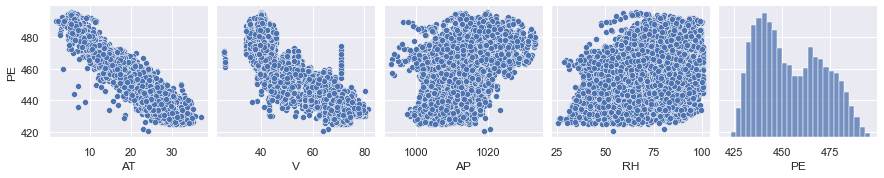

In [626]:
sns.pairplot(df, y_vars= 'PE')

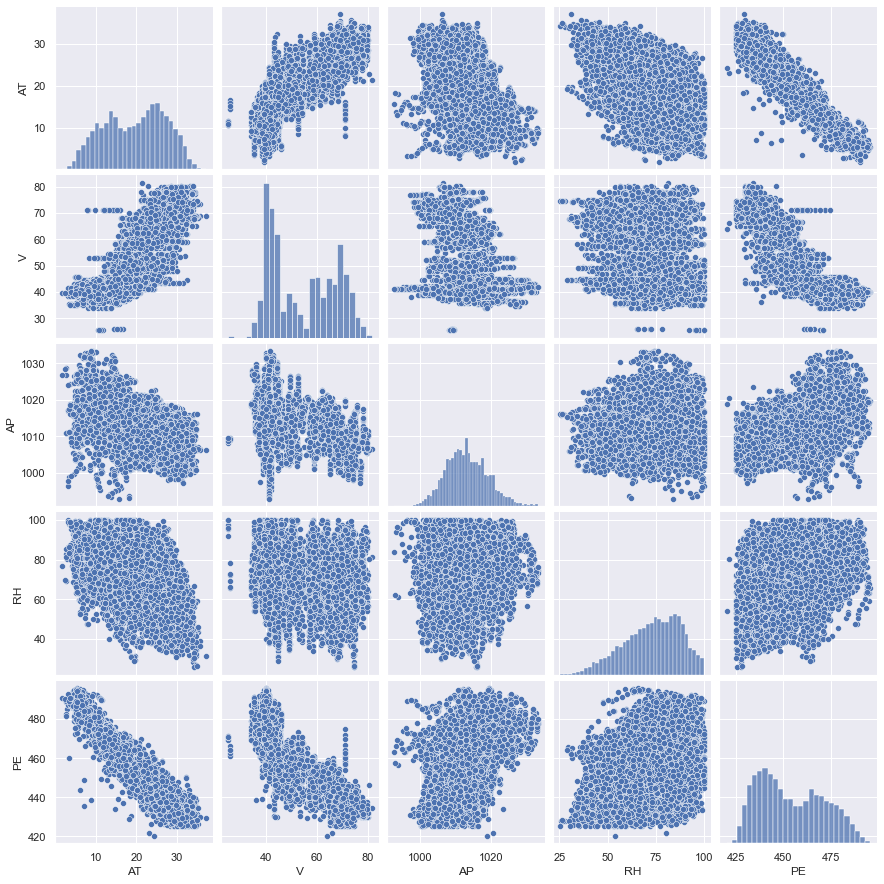

In [627]:
sns.pairplot(df)

In [628]:
# There seems to be a strong negative correlation between PE and AT
# There seems to be a strong negative correlation between PE and V

In [629]:
# Exploring the dataset
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### ii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table

In [630]:
def inter_quartile_range(x):
    return np.subtract(*np.percentile(x,[75,25]))

int_quart = list(df.apply(inter_quartile_range))
medians=list(df.median())
quantiles_first = list(df.quantile(0.25))
quantiles_third = list(df.quantile(0.75))
mean_bhai = list(df.mean())
ranges = list(df.max()-df.min())

tab_dat = {'Mean':mean_bhai,'Range':ranges,'Median':medians,'First Quartile': quantiles_first,'Third quartile':quantiles_third,'Interquartile range':int_quart}
tab_dat = pd.DataFrame(tab_dat)
tab_dat.set_index(df.columns)

,Mean,Range,Median,First Quartile,Third quartile,Interquartile range
AT,19.651231,35.30,20.345,13.5100,25.72,12.2100
V,54.305804,56.20,52.080,41.7400,66.54,24.8000
AP,1013.259078,40.41,1012.940,1009.1000,1017.26,8.1600
RH,73.308978,74.60,74.975,63.3275,84.83,21.5025
PE,454.365009,75.50,451.550,439.7500,468.43,28.6800


#### (c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?


In [631]:
df2=df.copy()

In [632]:
x=df['AT']
x = sm.add_constant(x)
y= df['PE']
mod = sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:46   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

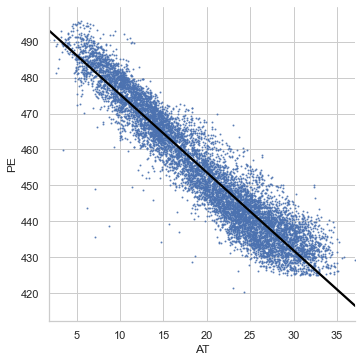

In [633]:
sns.set_style('whitegrid')
sns.lmplot(x ='AT', y ='PE', data = df,line_kws={"color": "black"},scatter_kws={'s':1})

In [634]:
np.set_printoptions(suppress=True)
import statsmodels.api as sm
#create instance of influence
influence = mod.fit().get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance
cooks

(array([0.00000413, 0.00001112, 0.0000587 , ..., 0.0000018 , 0.00016707,
        0.00001878]),
 array([0.99999587, 0.99998888, 0.9999413 , ..., 0.9999982 , 0.99983295,
        0.99998122]))

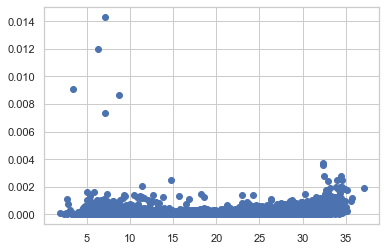

In [635]:
import matplotlib.pyplot as plt
plt.scatter(df.AT, cooks[0])


In [636]:
# Yes, we could potentially remove outliers for AT as evidenced in the graph above -
# can remove points with a cooks distance > 0.000418 (4/n)

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [637]:
x=df['V']
x = sm.add_constant(x)
y= df['PE']
mod = sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:49   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

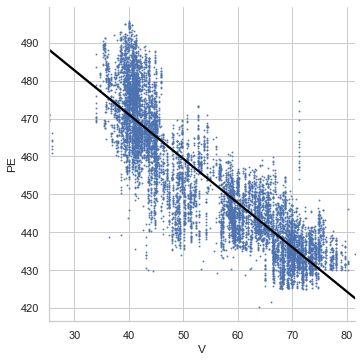

In [638]:
sns.set_style('whitegrid')
sns.lmplot(x ='V', y ='PE', data = df, line_kws={"color": "black"},scatter_kws={'s':1})

In [639]:
np.set_printoptions(suppress=True)
import statsmodels.api as sm
#create instance of influence
influence = mod.fit().get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance
cooks

(array([0.00004829, 0.00000001, 0.00049331, ..., 0.00000506, 0.00000156,
        0.00007568]),
 array([0.99995171, 0.99999999, 0.99950681, ..., 0.99999494, 0.99999844,
        0.99992432]))

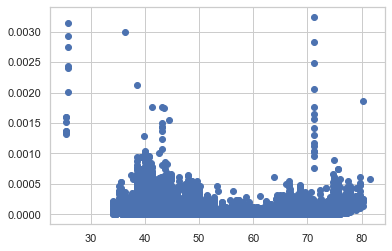

In [640]:
plt.scatter(df.V, cooks[0])

In [641]:
# Yes, we could potentially remove outliers for V as evidenced in the graph above -
# can remove points with a cooks distance > 0.000418 (4/n) - many outliers

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [642]:
x=df['AP']
x = sm.add_constant(x)
y= df['PE']
mod = sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:52   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

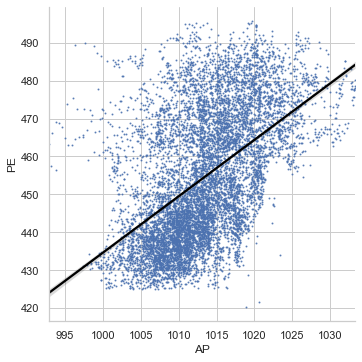

In [643]:
sns.set_style('whitegrid')
sns.lmplot(x ='AP', y ='PE', data = df,line_kws={"color": "black"},scatter_kws={'s':1})

In [644]:
np.set_printoptions(suppress=True)
import statsmodels.api as sm
#create instance of influence
influence = mod.fit().get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance
cooks

(array([0.0000551 , 0.0002284 , 0.00032584, ..., 0.00014524, 0.00009445,
        0.00001741]),
 array([0.99994491, 0.99977163, 0.99967421, ..., 0.99985477, 0.99990555,
        0.99998259]))

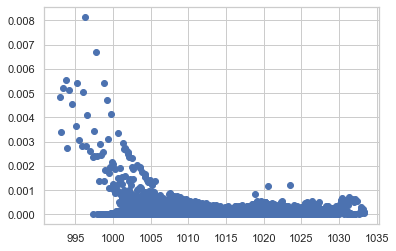

In [645]:
plt.scatter(df.AP, cooks[0])

In [646]:
# Yes, we could potentially remove outliers for AP as evidenced in the graph above -
# can remove points with a cooks distance > 0.000418 (4/n)

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [647]:
x=df['RH']
x = sm.add_constant(x)
y= df['PE']
mod = sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:55   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [648]:
df5=df[['RH','PE']]
df5.insert(loc=2,
          column='RH2',
          value=df['RH']**2)
df5.insert(loc=3,
          column='RH3',
          value=df['RH']**3)

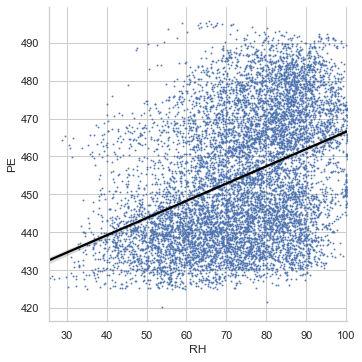

In [649]:
sns.set_style('whitegrid')
sns.lmplot(x ='RH', y ='PE', data = df,line_kws={"color": "black"},scatter_kws={'s':1})

In [650]:
np.set_printoptions(suppress=True)
import statsmodels.api as sm
#create instance of influence
influence = mod.fit().get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance
cooks

(array([0.00001698, 0.00000509, 0.00036988, ..., 0.00010019, 0.00006148,
        0.00000047]),
 array([0.99998302, 0.99999491, 0.99963019, ..., 0.99989982, 0.99993853,
        0.99999953]))

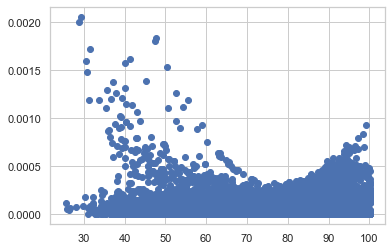

In [651]:
plt.scatter(df.RH, cooks[0])

In [652]:
# Yes, we could potentially remove outliers for RH as evidenced in the graph above -
# can remove points with a cooks distance > 0.000418 (4/n)

In [653]:
# It seems that AT, V, AP and RH have a strong association with PE - looking at the p-value and graphs

#### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [654]:
# Assume alpha = 0.05
X=df[['AT','V','AP','RH']]
Y=df['PE']
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:58   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [655]:
# Regression equation:
# PE = 454.6093  -1.9775 * AT - 0.2339 * V  + 0.0621 *AP - 0.1581 * RH
# P value for all paramters is less than alpha.
# Hence, we can reject the null hypothesis for all parameters which is statistically significant at an alpha level of 0.05. (Assumption)

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [656]:
# The multiple regression model gives a better R-squared error (0.929)  as compared to the simple linear regression models 
# It is able to explain the dependant variable better

<Figure size 360x360 with 0 Axes>

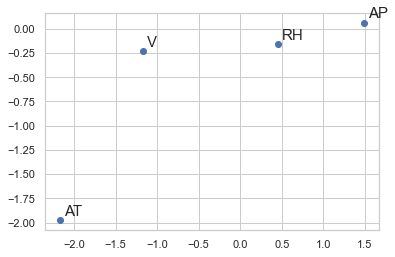

In [657]:
plt.figure(figsize=(5, 5))
X = [-2.1713 , -1.1681, 1.4899, 0.4557 ]
Y = [-1.9775 , -0.2339, 0.0621, -0.1581 ]
N = ['AT','V','AP','RH']
#plt.scatter(X,Y)
fig, ax = plt.subplots()
ax.scatter(X, Y)

for i, txt in enumerate(N):
    ax.annotate(txt, (X[i]+0.05, Y[i]+0.05),fontsize=15)

#### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2 Y = β0 + β1X + β2X^2 + β3X^3 + e

In [658]:
df2=df[['AT','PE']]
df2.insert(loc=2,
          column='AT2',
          value=df2['AT']**2)
df2.insert(loc=3,
          column='AT3',
          value=df2['AT']**3)

In [659]:
df2

,AT,PE,AT2,AT3
0,14.96,463.26,223.8016,3348.071936
1,25.18,444.37,634.0324,15964.935832
2,5.11,488.56,26.1121,133.432831
3,20.86,446.48,435.1396,9077.012056
4,10.82,473.90,117.0724,1266.723368
...,...,...,...,...
9563,16.65,460.03,277.2225,4615.754625
9564,13.19,469.62,173.9761,2294.744759
9565,31.32,429.57,980.9424,30723.115968
9566,24.48,435.74,599.2704,14670.139392


In [660]:
X=df2[['AT','AT2', 'AT3']]
Y=df2['PE']
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:59   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
AT            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
AT2           -0.1251      0.007    -18.199      0.000      -0.139      -0.112
AT3            0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [661]:
df3=df[['V','PE']]
df3.insert(loc=2,
          column='V2',
          value=df3['V']**2)
df3.insert(loc=3,
          column='V3',
          value=df3['V']**3)

In [662]:
X=df3[['V','V2', 'V3']]
Y=df3['PE']
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:59   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
V2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
V3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [663]:
    df4=df[['AP','PE']]
df4.insert(loc=2,
          column='AP2',
          value=df['AP']**2)
df4.insert(loc=3,
          column='AP3',
          value=df['AP']**3)

In [664]:
X=df4[['AP','AP2', 'AP3']]
Y=df4['PE']
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:59   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
AP2           -0.0500      0.006     -8.439      0.000      -0.062      -0.038
AP3         2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [665]:
df5=df[['RH','PE']]
df5.insert(loc=2,
          column='RH2',
          value=df['RH']**2)
df5.insert(loc=3,
          column='RH3',
          value=df['RH']**3)

In [666]:
X=df5[['RH','RH2', 'RH3']]
Y=df5['PE']
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:59   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
RH2            0.0321      0.007      4.433      0.000       0.018       0.046
RH3           -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [667]:
# V2 has a p value greater than alpha. Therefore, we can potentailly mark it as statistically insignificant -  we fail to reject hypothesis
# For the rest, p value is less thanmn alpha - We can reject the null hypothesis

#### Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [668]:
df6 = df
df6.insert(loc=3,
          column='AT*V',
          value=df['AT']*df['V'])

df6.insert(loc=3,
          column='AT*AP',
          value=df['AT']*df['AP'])

df6.insert(loc=3,
          column='AT*RH',
          value=df['AT']*df['RH'])

df6.insert(loc=3,
          column='V*AP',
          value=df['V']*df['AP'])

df6.insert(loc=3,
          column='V*RH',
          value=df['V']*df['RH'])

df6.insert(loc=3,
          column='AP*RH',
          value=df['AP']*df['RH'])


In [669]:
df6

,AT,V,AP,AP*RH,V*RH,V*AP,AT*RH,AT*AP,AT*V,RH,PE
0,14.96,41.76,1024.07,74931.2019,3055.5792,42765.1632,1094.6232,15320.0872,624.7296,73.17,463.26
1,25.18,62.96,1020.04,60263.9632,3719.6768,64221.7184,1487.6344,25684.6072,1585.3328,59.08,444.37
2,5.11,39.40,1012.16,93260.4224,3630.3160,39879.1040,470.8354,5172.1376,201.3340,92.14,488.56
3,20.86,57.32,1010.24,77424.7936,4393.0048,57906.9568,1598.7104,21073.6064,1195.6952,76.64,446.48
4,10.82,37.50,1009.23,97511.8026,3623.2500,37846.1250,1045.4284,10919.8686,405.7500,96.62,473.90
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,92274.9100,4521.7900,50386.1569,1515.1500,16883.2665,827.3385,91.00,460.03
9564,13.19,39.18,1023.67,68360.6826,2616.4404,40107.3906,880.8282,13502.2073,516.7842,66.78,469.62
9565,31.32,74.33,1012.92,36951.3216,2711.5584,75290.3436,1142.5536,31724.6544,2328.0156,36.48,429.57
9566,24.48,69.45,1013.86,63254.7254,4332.9855,70412.5770,1527.3072,24819.2928,1700.1360,62.39,435.74


In [670]:
X=df6[['AT', 'V', 'AP', 'AP*RH', 'V*RH', 'V*AP', 'AT*RH', 'AT*AP', 'AT*V',
       'RH']]
Y=df6['PE']
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:59   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
AP*RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
V*RH           0.0008      0.000      1.716      0.086      -0.000       0.002
V*AP           0.0068      0.001      5.135      0.000       0.004       0.009
AT*RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AT*AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT*V           0.0210      0.001     23.338      0.000       0.019       0.023
RH             1.5709      0.773      2.031      0.042       0.055       3.087
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [671]:
# From the table above, it is evident that:
# For pairwise predictors AT*V, AT*RH, V*AP, AP*RH -p value < 0.05 - we reject null hypothesis for them and 
# can consider them as having an effect on the predictor. - evidence there

#### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [672]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X= df[['AT','V','AP','RH']]
Y= df['PE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)

In [673]:
reg = LinearRegression().fit(X_train, Y_train)
resu=reg.predict(X_test)
#reg.score(resu,Y_train)
#est_error = reg.score(X_train, Y_train)

In [674]:
train_error=1-reg.score(X_train,Y_train)

In [675]:
test_error=1-reg.score(X_test,Y_test)

In [676]:
Y_train_p = reg.predict(X_train)
print(Y_train)

6753    466.20
3799    447.70
10      453.02
8645    479.18
6805    462.54
         ...  
1741    456.77
8243    444.52
8823    482.17
9020    453.40
9236    483.79
Name: PE, Length: 6697, dtype: float64


In [677]:
Y_test_p= reg.predict(X_test)
print(Y_test_p)

[435.51502921 461.23403593 441.24785862 ... 472.24078093 441.07993724
 461.24654073]


In [678]:
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(Y_test_p,Y_test)
MSE_test

21.247260604299058

In [679]:
MSE_train = mean_squared_error(Y_train_p,Y_train)
MSE_train

20.57636172462127

In [680]:
X_train = sm.add_constant(X_train) 
est = sm.OLS(Y_train, X_train).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.196e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:07:59   Log-Likelihood:                -19629.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.0634     11.620     39.076      0.000     431.285     476.842
AT            -2.0019      0.018   -109.947      0.000      -2.038      -1.966
V             -0.2196      0.009    -25.323      0.000      -0.237      -0.203
AP             0.0627      0.011      5.561      0.000       0.041       0.085
RH            -0.1635      0.005    -33.122      0.000      -0.173      -0.154
==============================================================================
Omnibus:                      734.083   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3878.067
Skew:                          -0.397   Prob(JB):                         0.00
Kurtosis:                       6.642   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [715]:
data = pd.read_excel('../Data/Folds5x2_pp.xlsx',sheet_name='Sheet1')
dff=pd.DataFrame(data)
dff.insert(loc=2,
          column='V2',
          value=dff['V']**2)

dff.insert(loc=2,
          column='AT2',
          value=dff['AT']**2)

dff.insert(loc=2,
          column='AP2',
          value=dff['AP']**2)

dff.insert(loc=2,
          column='RH2',
          value=dff['RH']**2)

dff.insert(loc=3,
          column='AT*V',
          value=dff['AT']*df['V'])

dff.insert(loc=3,
          column='AT*AP',
          value=dff['AT']*df['AP'])

dff.insert(loc=3,
          column='AT*RH',
          value=dff['AT']*df['RH'])

dff.insert(loc=3,
          column='V*AP',
          value=dff['V']*df['AP'])

dff.insert(loc=3,
          column='V*RH',
          value=dff['V']*df['RH'])

dff.insert(loc=3,
          column='AP*RH',
          value=dff['AP']*df['RH'])


In [716]:
dff

,AT,V,RH2,AP*RH,V*RH,V*AP,AT*RH,AT*AP,AT*V,AP2,AT2,V2,AP,RH,PE
0,14.96,41.76,5353.8489,74931.2019,3055.5792,42765.1632,1094.6232,15320.0872,624.7296,1.048719e+06,223.8016,1743.8976,1024.07,73.17,463.26
1,25.18,62.96,3490.4464,60263.9632,3719.6768,64221.7184,1487.6344,25684.6072,1585.3328,1.040482e+06,634.0324,3963.9616,1020.04,59.08,444.37
2,5.11,39.40,8489.7796,93260.4224,3630.3160,39879.1040,470.8354,5172.1376,201.3340,1.024468e+06,26.1121,1552.3600,1012.16,92.14,488.56
3,20.86,57.32,5873.6896,77424.7936,4393.0048,57906.9568,1598.7104,21073.6064,1195.6952,1.020585e+06,435.1396,3285.5824,1010.24,76.64,446.48
4,10.82,37.50,9335.4244,97511.8026,3623.2500,37846.1250,1045.4284,10919.8686,405.7500,1.018545e+06,117.0724,1406.2500,1009.23,96.62,473.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,8281.0000,92274.9100,4521.7900,50386.1569,1515.1500,16883.2665,827.3385,1.028216e+06,277.2225,2469.0961,1014.01,91.00,460.03
9564,13.19,39.18,4459.5684,68360.6826,2616.4404,40107.3906,880.8282,13502.2073,516.7842,1.047900e+06,173.9761,1535.0724,1023.67,66.78,469.62
9565,31.32,74.33,1330.7904,36951.3216,2711.5584,75290.3436,1142.5536,31724.6544,2328.0156,1.026007e+06,980.9424,5524.9489,1012.92,36.48,429.57
9566,24.48,69.45,3892.5121,63254.7254,4332.9855,70412.5770,1527.3072,24819.2928,1700.1360,1.027912e+06,599.2704,4823.3025,1013.86,62.39,435.74


In [717]:
# Gives a lower r2 error than the earlier model

In [718]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=dff[['AT', 'V', 'RH2', 'AP*RH', 'V*RH', 'V*AP', 'AT*RH', 'AT*AP', 'AT*V', 'AP2', 'AT2', 'V2', 'AP', 'RH']]
Y=dff['PE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)
X_train = sm.add_constant(X_train) 
est = sm.OLS(Y_train, X_train).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7236.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:21:25   Log-Likelihood:                -19178.
No. Observations:                6697   AIC:                         3.839e+04
Df Residuals:                    6682   BIC:                         3.849e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7014.2963   1426.977     -4.915      0.000   -9811.626   -4216.967
AT            -5.5478      3.646     -1.522      0.128     -12.695       1.600
V             -3.0880      1.776     -1.738      0.082      -6.570       0.394
RH2           -0.0021      0.000     -6.589      0.000      -0.003      -0.001
AP*RH         -0.0035      0.001     -3.496      0.000      -0.005      -0.002
V*RH           0.0009      0.001      1.133      0.257      -0.001       0.002
V*AP           0.0026      0.002      1.529      0.126      -0.001       0.006
AT*RH         -0.0067      0.002     -3.828      0.000      -0.010      -0.003
AT*AP          0.0029      0.004      0.811      0.417      -0.004       0.010
AT*V           0.0130      0.003      4.115      0.000       0.007       0.019
AP2           -0.0072      0.001     -5.324      0.000      -0.010      -0.005
AT2            0.0151      0.004      4.165      0.000       0.008       0.022
V2            -0.0018      0.001     -1.996      0.046      -0.004   -3.25e-05
AP            14.6751      2.768      5.302      0.000       9.249      20.101
RH             3.8007      1.035      3.673      0.000       1.772       5.829
==============================================================================
Omnibus:                     1276.214   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10061.194
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       8.842   Cond. No.                     2.84e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [719]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)
reg = LinearRegression().fit(X_train, Y_train)

In [720]:
Y_train_p = reg.predict(X_train)
Y_test_p= reg.predict(X_test)

In [721]:
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(Y_test_p,Y_test)
MSE_test

18.423042318271566

In [722]:
MSE_train = mean_squared_error(Y_train_p,Y_train)
MSE_train

17.984123789132752

In [689]:
# Removing V*RH,V*AP,AT*AP - p value less than 0.05

In [690]:
X=dff[['AT','V' ,'AP*RH', 'AT*RH', 'AT*V', 'AP2', 'AT2', 'V2', 'RH','RH2','AP']]

In [691]:
Y=dff['PE']

In [692]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)
X_train = sm.add_constant(X_train) 
est = sm.OLS(Y_train, X_train).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9193.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:08:02   Log-Likelihood:                -19185.
No. Observations:                6697   AIC:                         3.839e+04
Df Residuals:                    6685   BIC:                         3.848e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9650.2129   1100.878     -8.766      0.000   -1.18e+04   -7492.141
AT            -2.5206      0.116    -21.728      0.000      -2.748      -2.293
V             -0.3275      0.064     -5.132      0.000      -0.453      -0.202
AP*RH         -0.0049      0.001     -6.617      0.000      -0.006      -0.003
AT*RH         -0.0064      0.001     -7.414      0.000      -0.008      -0.005
AT*V           0.0096      0.002      4.174      0.000       0.005       0.014
AP2           -0.0094      0.001     -8.779      0.000      -0.012      -0.007
AT2            0.0161      0.003      6.321      0.000       0.011       0.021
V2            -0.0013      0.001     -1.627      0.104      -0.003       0.000
RH             5.2565      0.766      6.864      0.000       3.755       6.758
RH2           -0.0021      0.000     -7.477      0.000      -0.003      -0.002
AP            19.5811      2.175      9.004      0.000      15.318      23.844
==============================================================================
Omnibus:                     1277.777   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9806.944
Skew:                          -0.704   Prob(JB):                         0.00
Kurtosis:                       8.759   Cond. No.                     2.18e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [693]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)
reg = LinearRegression().fit(X_train, Y_train)

In [694]:
Y_train_p = reg.predict(X_train)
Y_test_p= reg.predict(X_test)

In [695]:
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(Y_test_p,Y_test)
MSE_test

18.452100494216634

In [696]:
MSE_train = mean_squared_error(Y_train_p,Y_train)
MSE_train

18.02083927826891

#### (i) KNN Regression:
#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.


In [697]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
df_err = pd.DataFrame()
#X_normalized = preprocessing.normalize(X_train)
data = pd.read_excel('../Data/Folds5x2_pp.xlsx',sheet_name='Sheet1')
dfff=pd.DataFrame(data)
X= dfff[['AT','V','AP','RH']]
Y= dfff['PE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    test_score = (1-neigh.score(X_test,Y_test))
    train_err = (1-neigh.score(X_train,Y_train))
    r2_scorer= r2_score(Y_test, Y_pred)
    df_err= pd.concat([df_err,pd.DataFrame([[i,train_err,test_score,r2_scorer]])])
    

In [698]:
df_err.columns=['k','train_err','test_err','r2 score']

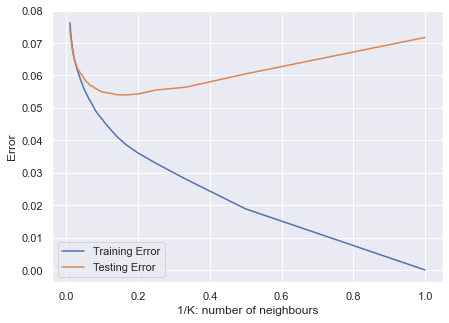

In [699]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
plt.plot(1/df_err['k'], df_err['train_err'], label='Training Error')
plt.plot(1/df_err['k'], df_err['test_err'], label='Testing Error')
plt.xlabel('1/K: number of neighbours')
plt.ylabel('Error')
plt.legend()
plt.show()

In [700]:
df_err.sort_values(by='r2 score',ascending = False).head()

,k,train_err,test_err,r2 score
0,6,0.038614,0.053989,0.946011
0,7,0.040947,0.054013,0.945987
0,5,0.036055,0.054293,0.945707
0,8,0.043115,0.054456,0.945544
0,9,0.044860,0.054690,0.945310


In [701]:
# Best k selected - 6

In [702]:
# KNN regression is better when considering r2 error

In [703]:
data = pd.read_excel('../Data/Folds5x2_pp.xlsx',sheet_name='Sheet1')
dff2=pd.DataFrame(data)
from sklearn.preprocessing import MinMaxScaler
X= dff2[['AT','V','AP','RH']]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
Y= dff2['PE']
#dff2 = pd.DataFrame(preprocessing.normalize(dff2),columns=dff2.columns)

In [704]:
X

array([[0.37252125, 0.29181495, 0.77159119, 0.63820375],
       [0.66203966, 0.66903915, 0.6718634 , 0.44932976],
       [0.09348442, 0.24982206, 0.47686216, 0.8924933 ],
       ...,
       [0.83597734, 0.87135231, 0.49566939, 0.1463807 ],
       [0.64220963, 0.78451957, 0.51893096, 0.49369973],
       [0.56062323, 0.66120996, 0.60232616, 0.56715818]])

In [705]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=66)
df_err2=pd.DataFrame()

for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    test_score = (1-neigh.score(X_test,Y_test))
    train_err = (1-neigh.score(X_train,Y_train))
    r2_scorer= r2_score(Y_test, Y_pred)
    df_err2= pd.concat([df_err2,pd.DataFrame([[i,train_err,test_score,r2_scorer]])])

In [706]:
df_err2.columns=['k','train_err','test_err','r2 score']

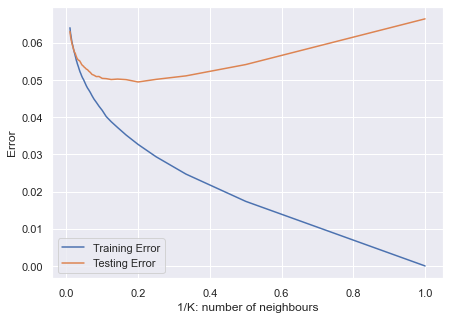

In [707]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
plt.plot(1/df_err2['k'], df_err2['train_err'], label='Training Error')
plt.plot(1/df_err2['k'], df_err2['test_err'], label='Testing Error')
plt.xlabel('1/K: number of neighbours')
plt.ylabel('Error')
plt.legend()
plt.show()

In [708]:
df_err2.sort_values(by='r2 score',ascending = False).head()

,k,train_err,test_err,r2 score
0,5,0.032661,0.049448,0.950552
0,6,0.035181,0.050081,0.949919
0,8,0.038769,0.050107,0.949893
0,4,0.029353,0.050150,0.949850
0,7,0.037203,0.050228,0.949772


In [709]:
df_err2[df_err2['k']==5] # best r2  - optimal k

,k,train_err,test_err,r2 score
0,5,0.032661,0.049448,0.950552


In [710]:
dff2

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [711]:
df_err2

,k,train_err,test_err,r2 score
0,1,0.000000,0.066412,0.933588
0,2,0.017360,0.054127,0.945873
0,3,0.024692,0.051087,0.948913
0,4,0.029353,0.050150,0.949850
0,5,0.032661,0.049448,0.950552
...,...,...,...,...
0,96,0.063647,0.062706,0.937294
0,97,0.063741,0.062793,0.937207
0,98,0.063848,0.062905,0.937095
0,99,0.063942,0.062986,0.937014


#### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

In [712]:
# KNN Regression with normalized features has given us a lower test error
# and a better r2 error than the unnormalized KNN regression and linear regression

#### 2. ISLR: 2.4.1

In [713]:
# a) We would expect better performance from a flexible model because the large sample size and small p would imply
#  the chances of overfitting wouldm be reduced - as the model variance would be reduced

# b) We would expect the flexible model to not have good performance. This is because, since the sample size is small 
#  and the predictors large, the model would attempt to account for all the observations - inducing 'wiggliness' in the curve - which would lead to overfitting

# c) We would expect the flexible model to perform better because it is more capable of unearthing non-linear relationships
#  between predictors and response. It is flexible and can induce 'wiggliness' to account for the non-linearity

# d) We would expexct the flexible model to overfit on the training data, as it would be susceptible to the high variance,
#  and it order to account for it, the model might overfit

#### 3. ISLR: 2.4.7

In [714]:
#  a) Calculating the euclidean sums for the observation: (sqrt((x1-x2)^2 + (y2-y1)^2)+(z2-z1)^2) where x1,y1,z1=0
#         Euclidean distance     Y
#     1)         3              Red
#     2)         2              Red
#     3)      sqrt(10)          Red
#     4)      sqrt(5)          Green
#     5)      sqrt(2)          Green
#     6)      sqrt(3)           Red

#  b) For k=1, nearest neighbour is sqrt(2) -> whose Y is Green. Therefore our prediction will be green

#  c) For k=3, nearest neighbours will be sqrt(2),sqrt(3) and 2. Two of the corresponding Ys are red, and one is green.
# Therefore, picking the majority, we select red as our prediction

#  d) If Bayesian decision boundary is highly non-linear, we can expect k to have a relatively smaller value. 
#  As k grows, the method becomes less flexible, and produces a decision boundary that is close to linear. This
#  implies low-variance and high bias. Whereas, when k is small, the decision boundary is overly flexible which
#  corresponds to a classifier that has low bias, but high variance. To fit non-linear characteristics, smaller k 
#  will be better